<a href="https://colab.research.google.com/github/santhoshmc/machine-learning/blob/main/Football_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mounting google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Reading files and performing EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path = "/content/drive/MyDrive/Python/Datasets/Bundesliga_Results.csv"

In [4]:
df = pd.read_csv(path)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [5]:
df = df.drop(['Div','Date'],axis=1)

In [6]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [7]:
HomeTeam = df["HomeTeam"]
AwayTeam = df["AwayTeam"]
print(HomeTeam)
print(AwayTeam)


0       Bayern Munich
1            Dortmund
2            Duisburg
3             FC Koln
4             Hamburg
            ...      
7650              NaN
7651       Leverkusen
7652            Mainz
7653              NaN
7654        Wolfsburg
Name: HomeTeam, Length: 7655, dtype: object
0             Freiburg
1            Karlsruhe
2           Leverkusen
3       Kaiserslautern
4             Nurnberg
             ...      
7650               NaN
7651          Hannover
7652               NaN
7653     Ein Frankfurt
7654           FC Koln
Name: AwayTeam, Length: 7655, dtype: object


In [8]:
home_away_team = pd.concat([HomeTeam,AwayTeam])

In [9]:
len(home_away_team.value_counts())

43

In [10]:
team_name = (home_away_team.value_counts()).index

In [11]:
matches_played = (home_away_team.value_counts()).values

In [12]:
plt.rcParams["figure.figsize"] = (10,30)

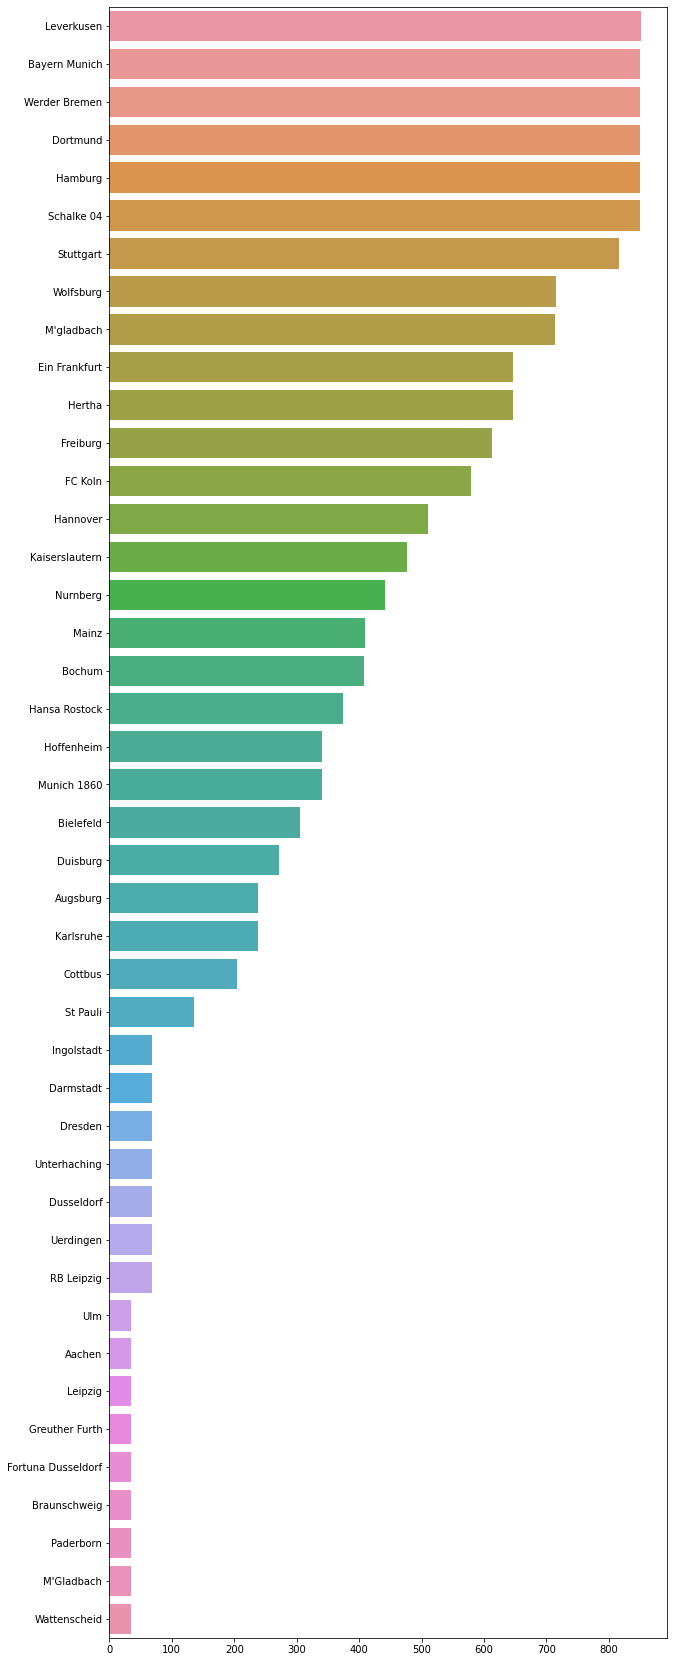

In [13]:
#sns.barplot( x=team_name, y=matches_played)
sns.barplot( y=team_name, x=matches_played)

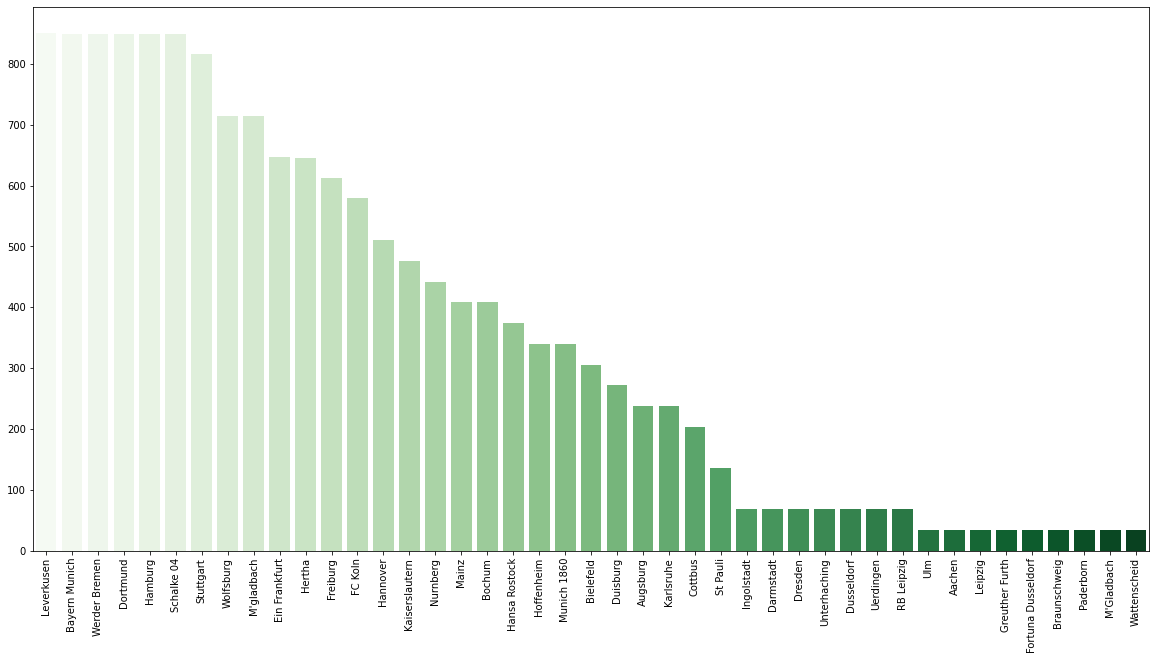

In [14]:
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot( x=team_name, y=matches_played, palette ="Greens"
            )
plt.xticks(rotation=90)
plt.show()

In [15]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [16]:
 df["FTR"].value_counts()

H    3591
A    2100
D    1964
Name: FTR, dtype: int64

In [17]:
 x = df["FTR"].value_counts().index


In [18]:
 y = df["FTR"].value_counts().values

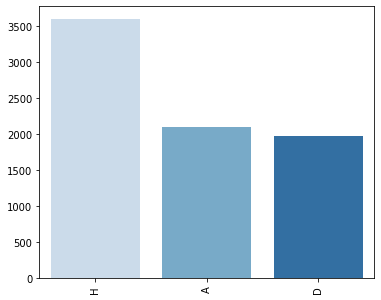

In [19]:
plt.rcParams["figure.figsize"] = (6,5)
sns.barplot( x=x, y=y, palette ="Blues")
plt.xticks(rotation=90)
plt.show()

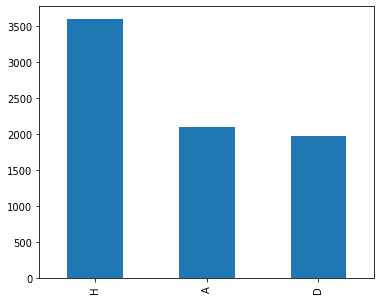

In [20]:
df["FTR"].value_counts().plot(kind= 'bar')
plt.show()

##Analysis on the basis of Home game

In [21]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


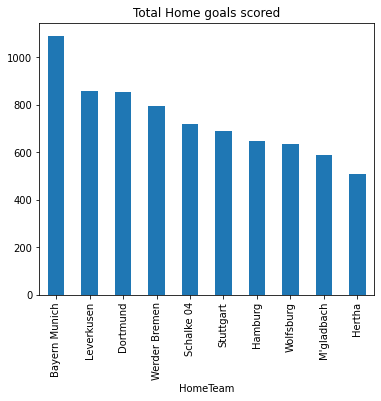

In [22]:
# Top 10 team with highest Home goals scored
x = df.groupby("HomeTeam")["FTHG"].sum()
x.sort_values(ascending=False)[0:10].plot(kind='bar',title='Total Home goals scored')
plt.show()

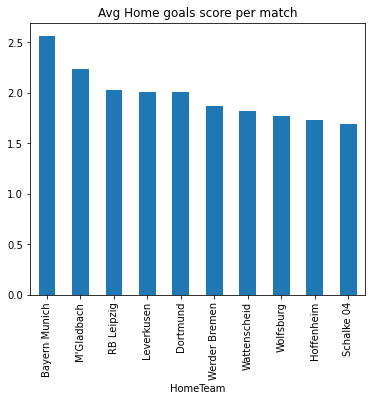

In [23]:
# Top 1o team by average goals scored in home
x = df.groupby("HomeTeam")["FTHG"].mean().sort_values(ascending= False)[:10]
x.plot(kind ='bar', title = 'Avg Home goals score per match')
plt.show()

In [24]:
def cond(x):
  if x == 'H':
    return 3
  elif x == 'D':
    return 1
  else:
    return 0

In [25]:
df["FTR"].apply(cond)

0       3
1       3
2       1
3       0
4       3
       ..
7650    3
7651    3
7652    0
7653    3
7654    3
Name: FTR, Length: 7655, dtype: int64

In [26]:
df['HomePoints'] = df["FTR"].apply(cond)

In [27]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3
...,...,...,...,...,...,...,...,...,...,...
7650,NaN,NaN,3,1,H,1.0,0.0,H,2017-18,3
7651,Leverkusen,Hannover,3,2,H,2.0,0.0,H,2017/18,3
7652,Mainz,NaN,1,2,A,1.0,1.0,D,2017-18,0
7653,NaN,Ein Frankfurt,1,0,H,1.0,0.0,H,2017-18,3


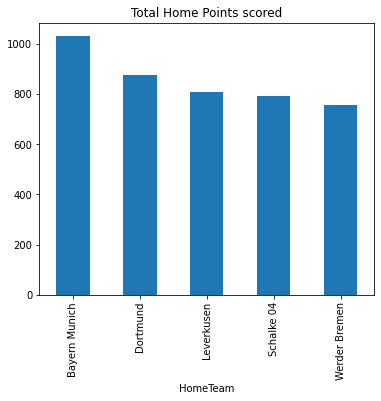

In [28]:
x = df.groupby("HomeTeam")["HomePoints"].sum()
x.sort_values(ascending=False)[0:5].plot(kind='bar',title='Total Home Points scored')
plt.show()

In [29]:
x.nlargest(n=5)

HomeTeam
Bayern Munich    1032
Dortmund          874
Leverkusen        809
Schalke 04        792
Werder Bremen     756
Name: HomePoints, dtype: int64

## Analysis on the basis of Away games

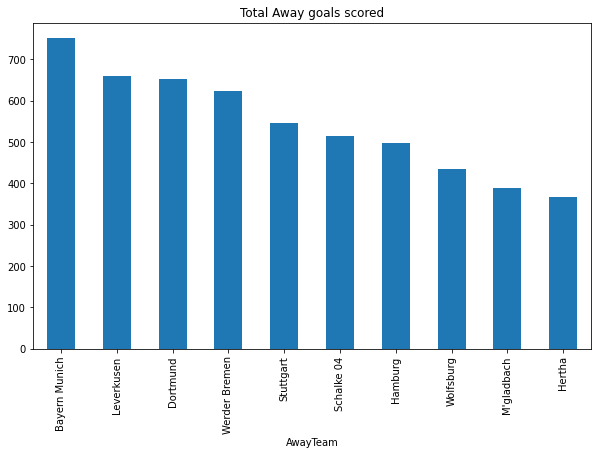

In [36]:
x = df.groupby("AwayTeam")["FTAG"].sum()
x.sort_values(ascending=False)[0:10].plot(kind='bar',title='Total Away goals scored')
plt.show()

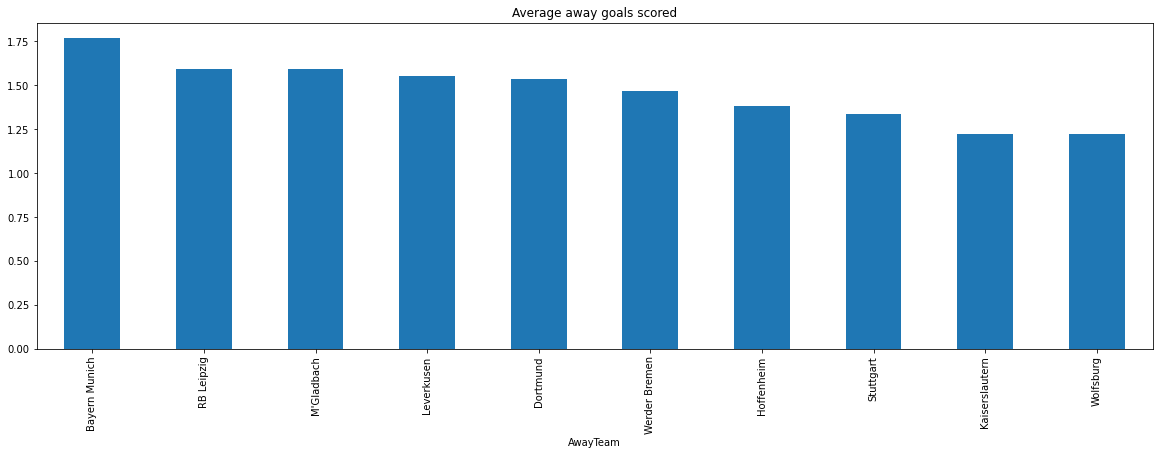

In [58]:
plt.rcParams["figure.figsize"] = (20,6)
x = df.groupby("AwayTeam")["FTAG"].mean()
x.sort_values(ascending=False)[0:10].plot(kind='bar',title='Average away goals scored')
plt.show()


In [38]:
def away(x):
  if x == 'A':
    return 3
  elif x == 'D':
    return 1
  else:
    return 0

In [39]:
df['AwayPoints'] = df["FTR"].apply(away)

In [41]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints,AwayPoints
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3,0
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,0
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1,1
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0,3
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3,0


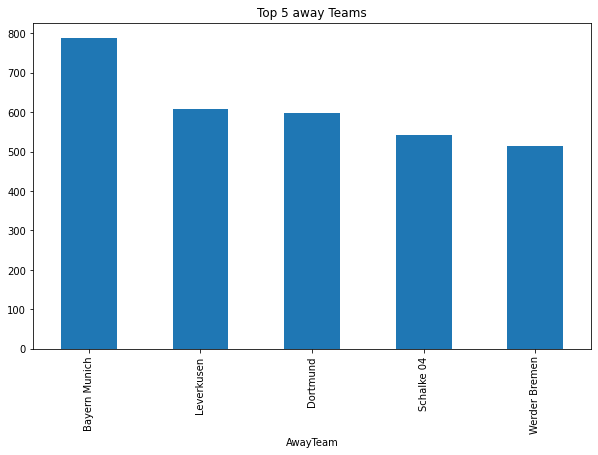

In [43]:
x = df.groupby("AwayTeam")["AwayPoints"].sum()
x.sort_values(ascending=False)[0:5].plot(kind='bar',title='Top 5 away Teams')
plt.show()

##Analyis on the basis of the result

In [44]:
df.head()


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints,AwayPoints
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3,0
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,0
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1,1
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0,3
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3,0


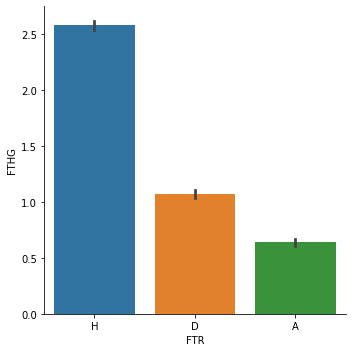

In [47]:
sns.catplot(data=df, x="FTR", y="FTHG", kind="bar")
plt.show()

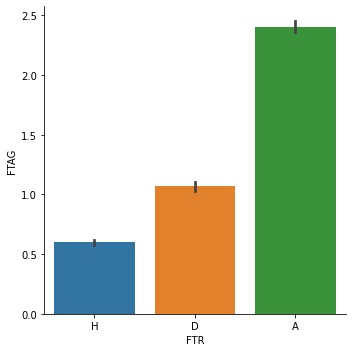

In [48]:
sns.catplot(data=df, x="FTR", y="FTAG", kind="bar")
plt.show()

##Analysis per season

In [49]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints,AwayPoints
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3,0
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,0
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1,1
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0,3
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3,0


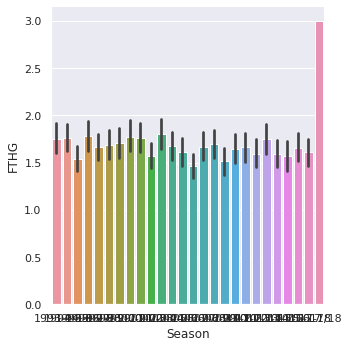

In [60]:

sns.set(rc={'figure.figsize':(20,5)})
sns.catplot(data=df, x="Season", y="FTHG", kind="bar")
plt.show()

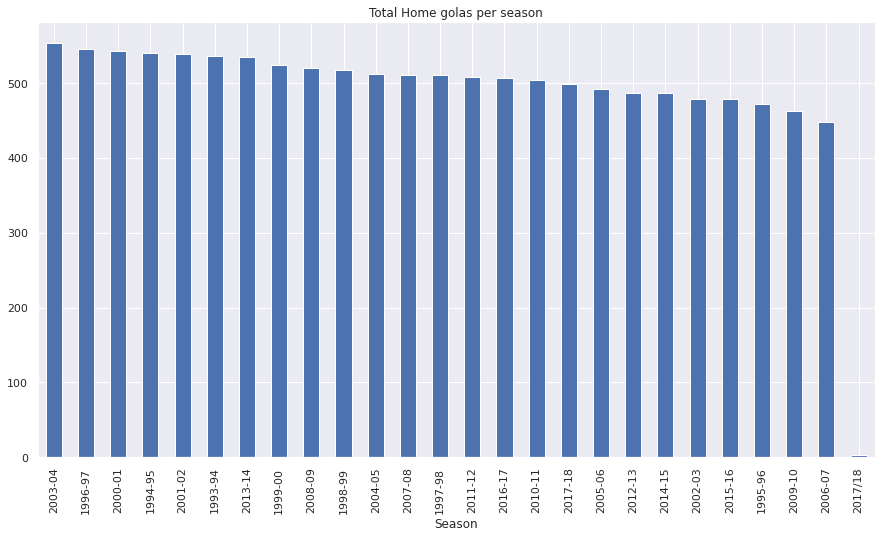

In [66]:
sns.set(rc={'figure.figsize':(15,8)})
g = df.groupby("Season")["FTHG"].sum()
g.sort_values(ascending=False).plot(kind='bar',title='Total Home goals per season')
plt.show()


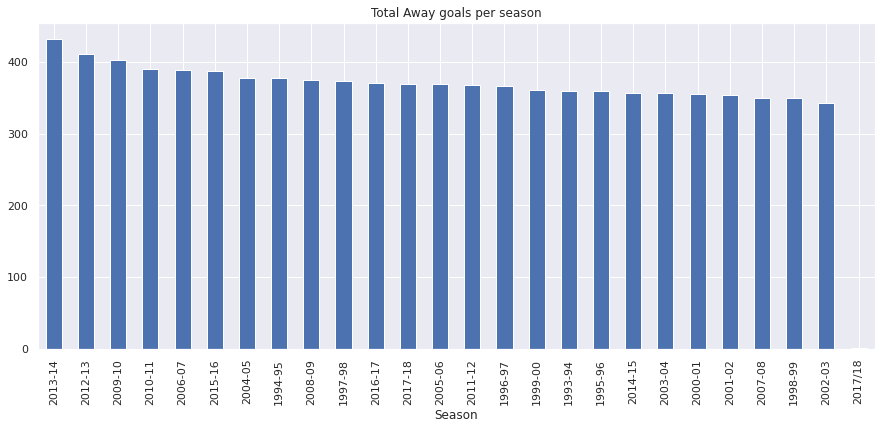

In [67]:
sns.set(rc={'figure.figsize':(15,6)})
g = df.groupby("Season")["FTAG"].sum()
g.sort_values(ascending=False).plot(kind='bar',title='Total Away goals per season')
plt.show()

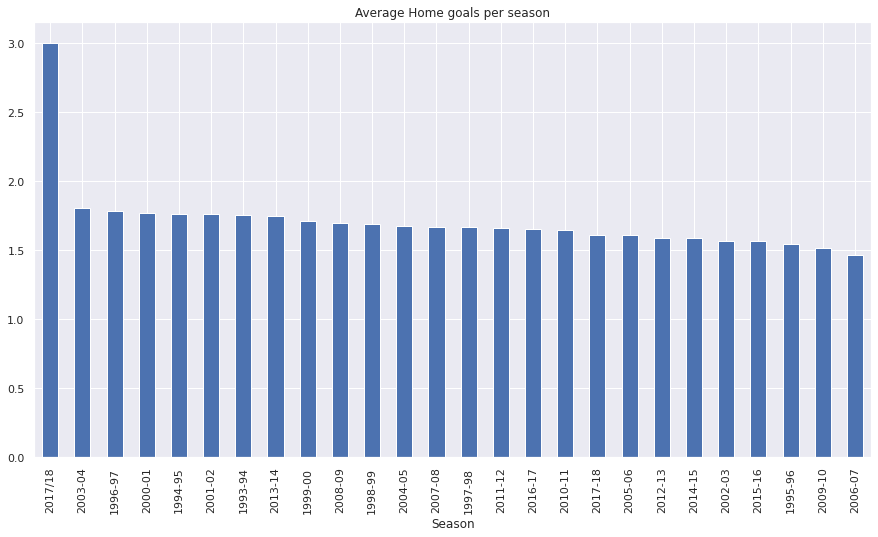

In [68]:
sns.set(rc={'figure.figsize':(15,8)})
g = df.groupby("Season")["FTHG"].mean()
g.sort_values(ascending=False).plot(kind='bar',title='Average Home goals per season')
plt.show()

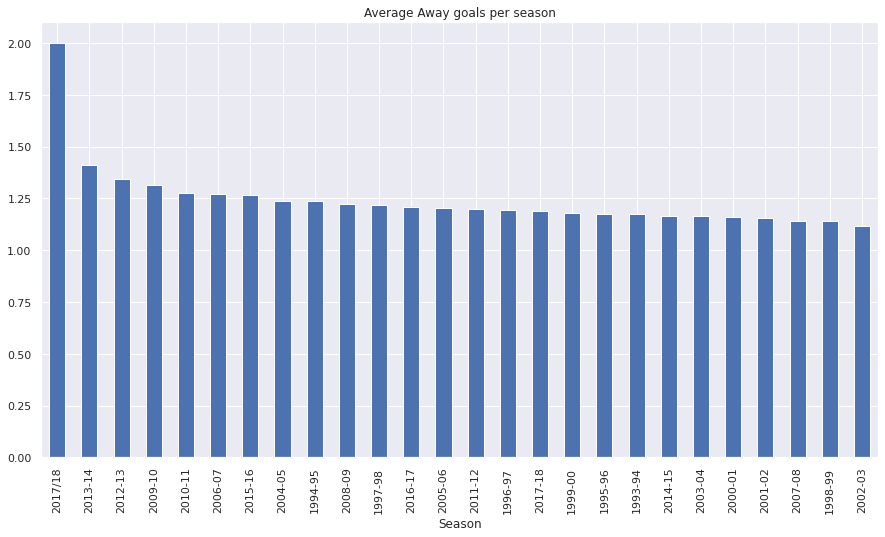

In [69]:
sns.set(rc={'figure.figsize':(15,8)})
g = df.groupby("Season")["FTAG"].mean()
g.sort_values(ascending=False).plot(kind='bar',title='Average Away goals per season')
plt.show()

##Correlation between categorical variables

In [70]:
import scipy.stats as ss


In [71]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints,AwayPoints
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94,3,0
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94,3,0
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94,1,1
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94,0,3
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94,3,0


In [73]:

 df['FTR'].replace(to_replace=['H', 'D', 'A'], value=[1, 2, 3], inplace=True)

In [74]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,HomePoints,AwayPoints
0,Bayern Munich,Freiburg,3,1,1,NaN,NaN,NaN,1993-94,3,0
1,Dortmund,Karlsruhe,2,1,1,NaN,NaN,NaN,1993-94,3,0
2,Duisburg,Leverkusen,2,2,2,NaN,NaN,NaN,1993-94,1,1
3,FC Koln,Kaiserslautern,0,2,3,NaN,NaN,NaN,1993-94,0,3
4,Hamburg,Nurnberg,5,2,1,NaN,NaN,NaN,1993-94,3,0


In [80]:
import numpy as np
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


In [81]:
cramers_corrected_stat(df['FTHG'],df['FTAG'])

0.02882947145926153